### Objectives:

- To plot the empirical and the theoretical distribution of the overall data without regard to classes.
- To plot the empirical and the theoretical distribution of the data of each class.

In this lab, we will look at how python can be used to analyze data using the pandas data analysis package, and how we can model data using probability distributions studied in class.

We will be using a data file which has been extracted from the Iris Flower Data Set, which is perhaps the best known database to be found in the pattern recognition literature. The original dataset consists of 50 samples from each of three species of Iris (setosa, versicolor and virginica). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For more information, please see the following page at the UCI Machine Learning Repository: 

https://archive.ics.uci.edu/ml/datasets/iris

In this problem, we will be working with a smaller dataset, which consideres only two types of irises: setosa and versicolor, and one random variable: petal width.

Download the file "iris petal width.xlsx" from Canvas to complete the lab. 

We recommend you use the pandas package, the numpy package and the scipy and matplotlib.pyplot libraries in python, as you have done in previous homeworks. 

After you have completed the notebook, export it as pdf for submission. You can do this in one of two ways:
1. Go to File, click Download as, click PDF via LaTeX (.pdf).
2. Go to File, click Download as, click HTML (.html), then convert the html file to pdf file.

We first load the datafile using the **pandas.read_excel** function into a **pandas.DataFrame**. 

In [1]:
# load pandas, a data analysis package
# load numpy, a scientific computing package
# load scipy.stats, a module contains probability functions
# load matplotlib.pyplot, a framework provides a Matlab-like plotting
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

data = pd.read_excel('iris_petal_width.xlsx',index_col = 'Index')

There are 100 entries in total in this data set.  The first 50 entries contains measurements of petal width from irises in the  **setosa** class. We can see a few examples using the **pandas.DataFrame.head** function, which returns the **first** few entries in the data frame.

In [2]:
data.head()

,Petal width,Class
Index,,
1,0.2,Iris-setosa
2,0.2,Iris-setosa
3,0.2,Iris-setosa
4,0.2,Iris-setosa
5,0.2,Iris-setosa


The last 50 entries contain measurements of the petal width from irises in the **versicolor** class.  We can can see a few examples using the **pandas.DataFrame.tail** function, which returns the **last** few entries in the data frame.

In [3]:
data.tail()

,Petal width,Class
Index,,
96,1.2,Iris-versicolor
97,1.3,Iris-versicolor
98,1.3,Iris-versicolor
99,1.1,Iris-versicolor
100,1.3,Iris-versicolor


From these lines, you should get the general idea that the petals of versicolor irises are generally longer than the petals of setosa irises. Thus, if you observe an iris with longer petals, it is "more likely" to be a versicolor than a setosa. Similarly, if you observe an iris with shorter petals, it is "more likely" to be a setosa. This assignment makes this intuition more precise using probability theory.

**Part a:** Plot the normalized histogram of the petal width for all the data without regard to which species from 0 to 2 with bin size 0.2. The normalized histogram is the count in each bin divided by the number of observations and divided by the bin width. In python, this can be selected by passing "density=True" into the **matplotlib.pyplot.hist** or **pandas.DataFrame.hist** functions.

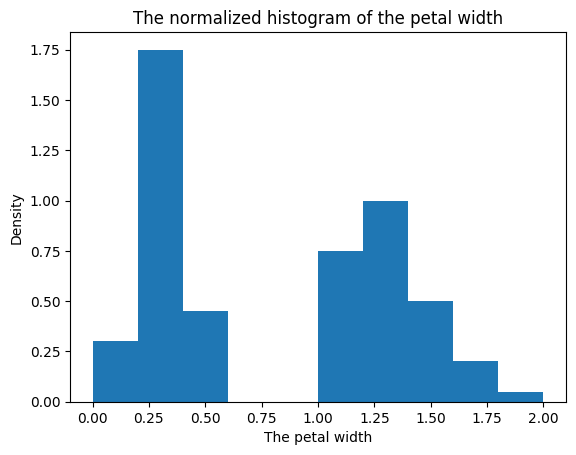

In [4]:
# create bins (complete the line below)
b = np.arange(0,2+0.2,0.2 )

# plot histograms (complete the line below)
data['Petal width'].plot.hist(bins = b, density = True)

# label plot
plt.title('The normalized histogram of the petal width')
plt.ylabel('Density')
plt.xlabel('The petal width')
plt.show()

**Part b:** Calculate empirical mean $m$ and standard deviation $\sigma$ of the petal width over all of the data without regard to species. For a set of data $\{r_1,r_2,⋯,r_n\}$, the empirical mean is given by 

$m=\frac{1}{n}\sum_{i=1}^{n}r_i$

and the empirical standard deviation is given by 

$\sigma=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(r_i-m)^2}$

If you have read the data in using the pandas package, then you can compute the mean and standard deviation easily using the **pandas.DataFrame.mean** and **pandas.DataFrame.std** functions.

In [5]:
# compute the empirical mean (complete the line below)
m = data['Petal width' ].mean()

# compute the standard deviation (complete the line below)
sd = data['Petal width' ].std()

print(f'The empirical mean of the petal width is {m}')
print(f'The empirical standard deviation of the petal width is {sd}')

The empirical mean of the petal width is 0.7849999999999998
The empirical standard deviation of the petal width is 0.5662877521029553


**Part c:** Assume that the probability density function of the petal width, $f_X(x)$, is given by a Gaussian distribution with mean and standard deviation computed in **Part b**. You can compute values of the Gaussian distribution in python using the **scipy.stats.norm.pdf** function. Note that the Gaussian distribution is also called the normal distribution.

Compare the normalized histogram in **Part a** with the plot of $f_X(x)$ by plotting both together in the same figure for $x$ from 0 to 2 with step 0.2. Does this look like a good model of the data? 

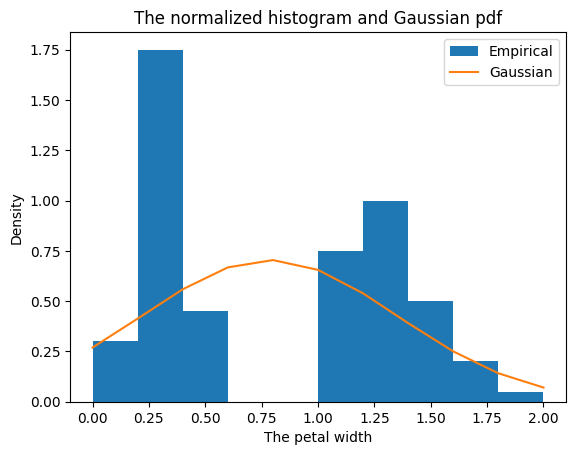

In [6]:
# create figure
fig, ax = plt.subplots()

# plot empirical histogram (complete the lines below)
b = np.arange(0,2+0.2,0.2)
data['Petal width' ].plot.hist(bins = b, density = True, ax = ax, label='Empirical')

# plot Gaussian distribution
# generate values from 0 to 2 with step 0.2 (complete the line below)
x = np.arange( 0, 2+0.2, 0.2)
# compute pdf values (complete the line below)
f_X = scipy.stats.norm.pdf(x, loc = m, scale = sd)

ax.plot(x, f_X, label = 'Gaussian')

# label plots
ax.legend()
plt.title('The normalized histogram and Gaussian pdf')
plt.xlabel('The petal width')
plt.ylabel('Density')
plt.show()

**Part c Answer:**

In [7]:
print("This is not a good model. The gaussian pdf only has one peak value but the empirical histogram has 2 peaks.")

This is not a good model. The gaussian pdf only has one peak value but the empirical histogram has 2 peaks.


**Part d:** Now generate plots of normalized histogram of the petal width for each species separately. You can separate data into different groups using the **pandas.DataFrame.groupby** command. Then for each group, you can use the **pandas.DataFrame.hist** command to plot the histogram.

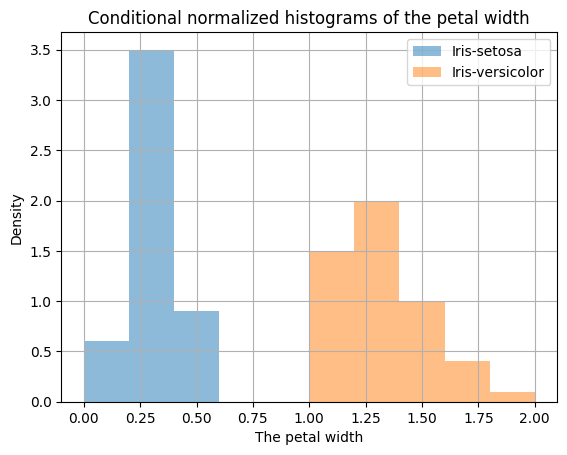

In [8]:
# create groups (complete the lines below)
groups = data.groupby('Class')['Petal width']

# plot histograms for each class, similar to part c (complete the lines below)
b = np.arange(0,2+0.2,0.2)
fig, ax = plt.subplots()
for name, group in groups:
    group.hist(bins = b, density = True, label = name, alpha = 0.5, ax = ax)

# label plots
ax.legend()
plt.title('Conditional normalized histograms of the petal width')
plt.xlabel('The petal width')
plt.ylabel('Density')
plt.show()

**Part e:** Use your knowledge of probability to model probability distributions of the petal width given setosa and versicolor, $f_{X|species}(x|setosa)$ and $f_{X|species}(x|versicolor)$. For each species, compare the normalized histogram with the conditional density by plotting them both in the same figure for $x$ from 0 to 2. 

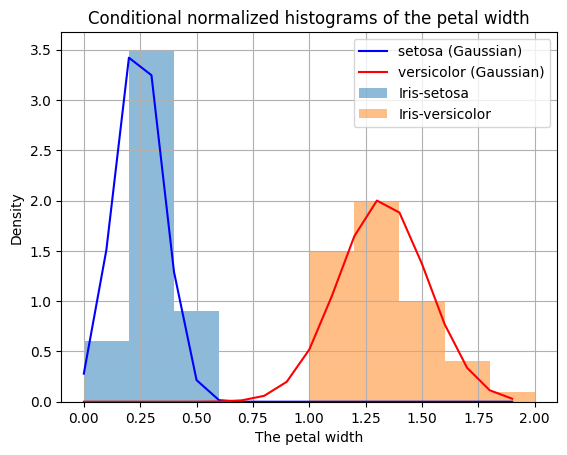

In [9]:
#create figure
fig, ax = plt.subplots()

# plot conditional pdfs
# generate values from 0 to 2 with step 0.1 (complete the line below)
x = np.arange(0,2,0.1 )

# compute the empirical conditional mean (complete the line below)
m_by_species = groups.mean()

# compute the empirical conditional standard deviation (complete the line below)
sd_by_species = groups.std()

# compute the conditional densities (complete the lines below)
f_X_setosa = scipy.stats.norm.pdf(x , loc = m_by_species['Iris-setosa' ], scale = sd_by_species['Iris-setosa' ])
f_X_versicolor = scipy.stats.norm.pdf(x , loc = m_by_species[ 'Iris-versicolor'], scale = sd_by_species['Iris-versicolor' ])

# plot pdf (complete the lines below)
ax.plot(x,f_X_setosa , 'b', label = 'setosa (Gaussian)')
ax.plot(x,f_X_versicolor , 'r', label = 'versicolor (Gaussian)')

# plot empirical distributions as before (complete the lines below)
b = np.arange(0,2+0.2,0.2 )
for name, group in groups:
    group.hist(bins = b, density = True,label = name, alpha = 0.5, ax=ax)

# label plots
ax.legend(bbox_to_anchor = (1,1))
plt.title('Conditional normalized histograms of the petal width')
plt.xlabel('The petal width')
plt.ylabel('Density')
plt.show()

**Part f:** Use the total probability theorem to combine the two conditional densities $f_{X|species}(x|setosa)$ and $f_{X|species}(x|versicolor)$ to obtain a new model distribution for the petal width, $g_X(x)$. Compare the plot of $g_X(x)$ with the normalized histogram in **Part a** by plotting both in the same figure for x from 0 to 2. How does this compare with the single Gaussian assumption in part **Part c**?

Text(0, 0.5, 'The pdf of Petal width')

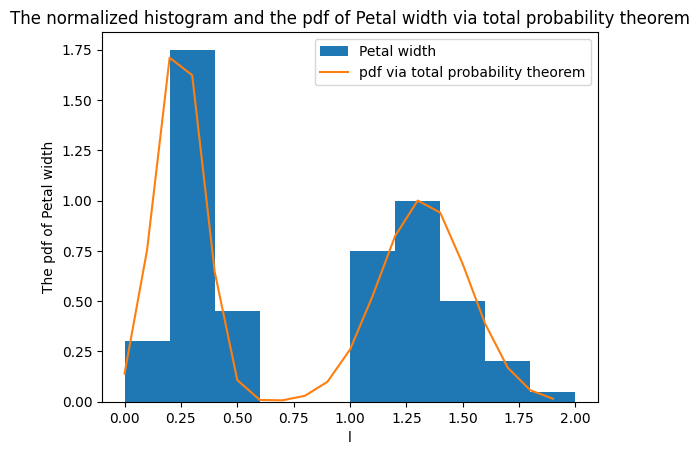

In [10]:
# put your code here

# generate values from 0 to 2 with step 0.1 (complete the line below)
x = np.arange(0,2,0.1 )
# compute the pdf value of petal width by the total probability theorem (complete the line below)

# check what type of petal, true if versicolor false if not
data['IsVeriscolor'] = (data['Class'] == 'Iris-versicolor')
# sum them
n_veriscolor = data.groupby('IsVeriscolor')['IsVeriscolor'].count()
n = sum(n_veriscolor)
# get probability of each, stored in prob_of_petal.iloc[0] and prob_of_petal.iloc[1]
prob_of_petal = n_veriscolor / n
# total probability theorem
g_X = f_X_setosa * prob_of_petal.iloc[0] + f_X_versicolor * prob_of_petal.iloc[1]

# set the bins from 0 to 2 with step 0.2 (complete the line below)
b = np.arange(0,2+0.2,0.2 )
# generate plots
fig, ax = plt.subplots()
# generate plots as usual (complete the line below)
data.plot.hist(bins = b, density = True, ax=ax)
ax.plot(x, g_X, label = 'pdf via total probability theorem')
ax.legend()
plt.title('The normalized histogram and the pdf of Petal width via total probability theorem')
plt.xlabel('l')
plt.ylabel('The pdf of Petal width')

**Part f Answer:**

In [11]:
print(" This distribution fits the normalized histogram in Part a better than the Guassian assumption in Part C since it has 2 peaks.")

 This distribution fits the normalized histogram in Part a better than the Guassian assumption in Part C since it has 2 peaks.
